In [15]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import random
import math

#max value of c = 54.99

Creating input data

In [16]:
def input_data(damping_coefficient, error, initial_displacement, number_points):
    # Defining some varibales
    natural_w = np.sqrt(12/63)
    damping_ratio = damping_coefficient/(2*63*natural_w)
    damping_w = natural_w*(np.sqrt(1-(damping_ratio**2)))
    phi = math.atan((np.sqrt(1-(damping_ratio**2))/damping_ratio))
    amplitude = initial_displacement*natural_w/damping_w

    input_x = np.linspace(0, 2*np.pi/damping_w, num= number_points, endpoint=True)

    final_list = []
    for x in input_x:
        y = (amplitude*math.exp(-damping_ratio*natural_w*x))*math.sin(damping_w*x+phi)
        final_list.append([x/max(input_x), y])
    
    # Creating noise in the input 
    for i in final_list:
        i[1] = i[1]*(100+random.randrange(-error, error))/100
    
    return final_list

In [17]:
def magnitude(vector):
    sum = 0
    for i in vector:
        sum = sum + i**2
    return sum

In [18]:
def func_derivative(input_data, degree_n, weights_values):
    x, y = sp.symbols('x y')
    
    str1=""
    for i in range(degree_n):
        str1 = str1 + 'w' + str(i) + " "
    str1 = str1 + 'w' + str(degree_n)

    weights = sp.symbols(str1)
    
    poly = weights[0]
    for i in range(1, degree_n + 1):
        poly = poly + weights[i]*x**i
    poly_2 = poly**2

    m=0
    for i in range(len(input_data)):
        m = m + (poly_2.subs(x, input_data[i][0])) - 2*(poly.subs(x, input_data[i][0]))*input_data[i][1] + (input_data[i][1])**2
    m = m/(len(input_data))
    
    f_grad = [m.diff(weights[i])for i in range(degree_n+1)]
    gradient_f = sp.lambdify(weights, f_grad, "numpy")
    
    final_list = np.array(gradient_f(*weights_values))
    return final_list


In [19]:
def gradient_descent(input_data, degree_n, weights_values, learning_rate):
    count = 0
    # The end condition to terminate iterations for gradient descent method is decided using its magnitude
    while magnitude(func_derivative(input_data, degree_n, weights_values)) > 10**(-4) and count<2500:
        weights_values = weights_values - learning_rate*(func_derivative(input_data, degree_n, weights_values))
        count = count + 1
    weights_values = np.array(weights_values)
    return weights_values

In [20]:
def polynomial(degree_n, weights_values, x_1):
    x, y = sp.symbols('x y')
    
    str1=""
    for i in range(degree_n):
        str1 = str1 + 'w' + str(i) + " "
    str1 = str1 + 'w' + str(degree_n)

    weights = sp.symbols(str1)
    
    poly = weights[0]
    for i in range(1, degree_n + 1):
        poly = poly + weights[i]*x**i
        
    new = (poly.subs((weights[i],weights_values[i]) for i in range(degree_n+1)))
    return (new.subs(x, x_1))

Main function below

[ 0.80683676 -2.21537503  1.40453871]


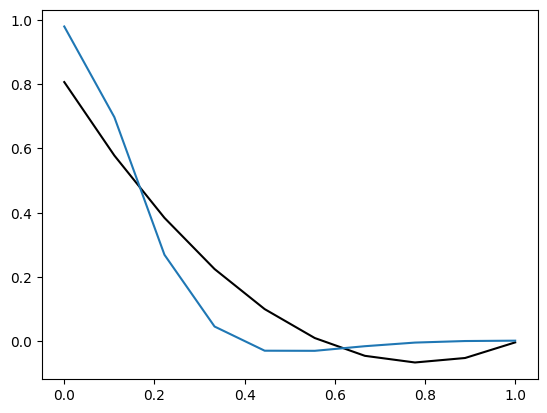

In [21]:
degree_n = int(input("Enter the degree of polynomial "))
error = int(input("Enter the error(noise) % "))
damping_constant = float(input("Enter the damping constant (max value = 54 as above code works only for underdamped) "))
learning_rate = float(input("Enter the learning rate "))
number_points = int(input("Enter number of data points "))

weights_guess = []
for i in range(degree_n+1):
  weights_guess.append(0)

weights_guess = np.array(weights_guess)

final_weights = gradient_descent(input_data(damping_constant, error, 1, number_points), degree_n, weights_guess, learning_rate)
print(final_weights)

list_1 = np.array(input_data(damping_constant, error, 1, number_points))
list_1 = np.transpose(list_1)

list_2 = [] 
for i in list_1[0]:
    list_2.append(polynomial(degree_n, final_weights, i))
    
plt.plot(list_1[0], list_2, color = "black")
plt.plot(list_1[0], list_1[1])
plt.show()